<a href="https://colab.research.google.com/github/RishabhNegi1/Research-Stock-Prediction/blob/main/SPX_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains 10,468 entries with the following columns:



1.  Date: The date of the stock price.
2.  Open: The opening price of the stock.
3. High: The highest price during the day.
4.Low: The lowest price during the day.
5.Close: The closing price of the stock.
6.Adj Close: The adjusted closing price, which accounts for events like dividends and stock splits.
7.Volume: The number of shares traded.

The ARIMA (AutoRegressive Integrated Moving Average) model is well-suited for analyzing and forecasting time series data like stock prices because:

1. **Captures Trends and Seasonality**: ARIMA models can capture underlying trends and seasonality in time series data by adjusting the model parameters accordingly.

2. **Handles Non-Stationary Data**: The "Integrated" part of ARIMA helps make non-stationary data stationary, which is crucial for accurate forecasting.

3. **Flexible and Powerful**: ARIMA's combination of autoregressive (AR) and moving average (MA) components allows it to model complex patterns in the data, such as correlations between current and past values.

4. **Short-Term Forecasting**: ARIMA is particularly effective for short- to medium-term forecasting, making it ideal for quarterly and yearly predictions of stock prices.

5. **Error Minimization**: The model minimizes prediction errors by adjusting to past data points, providing accurate forecasts with quantifiable errors like MAE and RMSE.

These features make ARIMA a powerful tool for analyzing financial time series data and making informed predictions.

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Load the dataset
data = pd.read_csv('/content/SPX.csv')


In [ ]:

# Convert Date column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample the data to get quarterly and yearly data
quarterly_data = data['Adj Close'].resample('Q').mean()
yearly_data = data['Adj Close'].resample('Y').mean()


In [ ]:

# Fit ARIMA model on quarterly data
model_quarterly = ARIMA(quarterly_data, order=(1, 1, 1))
model_quarterly_fit = model_quarterly.fit()

# Forecast the next 4 quarters (1 year ahead)
forecast_quarterly = model_quarterly_fit.forecast(steps=4)
quarterly_forecasted_values = model_quarterly_fit.predict(start=quarterly_data.index[1], end=quarterly_data.index[-1], dynamic=False)


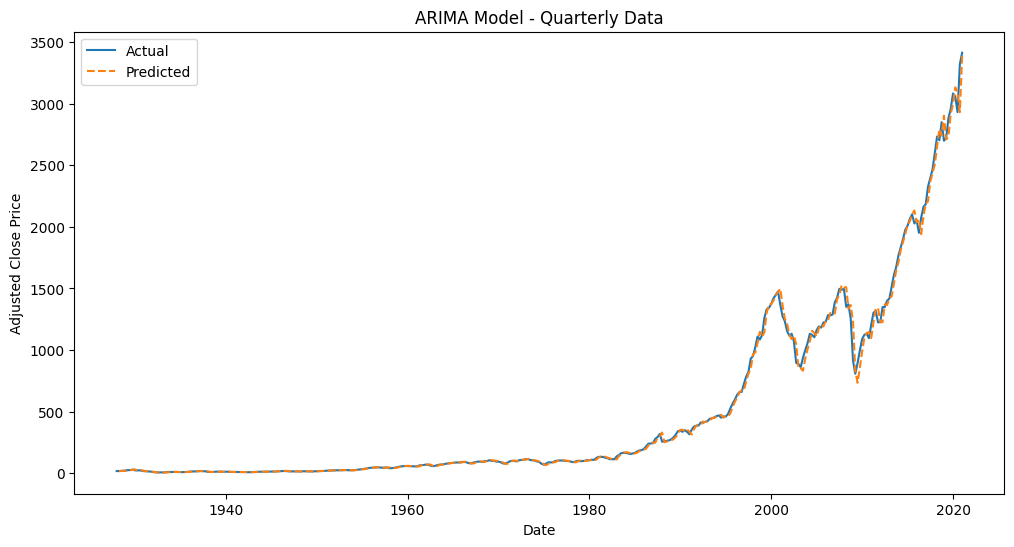

Quarterly Data - MAE: 19.51457987188311
Quarterly Data - RMSE: 45.605362053658375
Quarterly Forecast: 2021-03-31    3477.607867
2021-06-30    3534.233015
2021-09-30    3584.147297
2021-12-31    3628.146044
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Yearly Data - MAE: 41.89481325209618
Yearly Data - RMSE: 78.55643045713863
Yearly Forecast: 2021-12-31    3260.640625
2022-12-31    3281.031983
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [ ]:

# Calculate error metrics for quarterly data
mae_quarterly = mean_absolute_error(quarterly_data[1:], quarterly_forecasted_values)
rmse_quarterly = np.sqrt(mean_squared_error(quarterly_data[1:], quarterly_forecasted_values))

# Plot actual vs predicted for quarterly data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data, label='Actual')
plt.plot(quarterly_forecasted_values, label='Predicted', linestyle='--')
plt.title('ARIMA Model - Quarterly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Quarterly Data - MAE:", mae_quarterly)
print("Quarterly Data - RMSE:", rmse_quarterly)
print("Quarterly Forecast:", forecast_quarterly)


print("Yearly Data - MAE:", mae_yearly)
print("Yearly Data - RMSE:", rmse_yearly)
print("Yearly Forecast:", forecast_yearly)


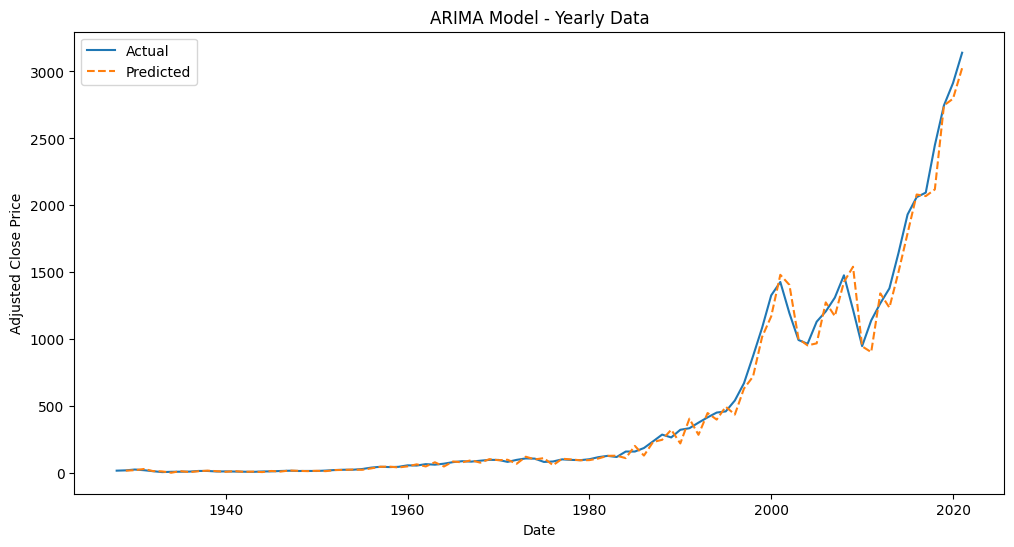

In [ ]:

# Fit ARIMA model on yearly data
model_yearly = ARIMA(yearly_data, order=(1, 1, 1))
model_yearly_fit = model_yearly.fit()

# Forecast the next 2 years
forecast_yearly = model_yearly_fit.forecast(steps=2)
yearly_forecasted_values = model_yearly_fit.predict(start=yearly_data.index[1], end=yearly_data.index[-1], dynamic=False)

# Calculate error metrics for yearly data
mae_yearly = mean_absolute_error(yearly_data[1:], yearly_forecasted_values)
rmse_yearly = np.sqrt(mean_squared_error(yearly_data[1:], yearly_forecasted_values))

# Plot actual vs predicted for yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data, label='Actual')
plt.plot(yearly_forecasted_values, label='Predicted', linestyle='--')
plt.title('ARIMA Model - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()